In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import sklearn.gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
import sklearn.neural_network
import warnings
warnings.filterwarnings("ignore")

In [2]:
red_wine_data = pd.read_csv('winequality-red.csv',sep=";")
# white_wine_data = pd.read_csv('winequality-white.csv')
# red_wine_data.isnull().values.any()
print(red_wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


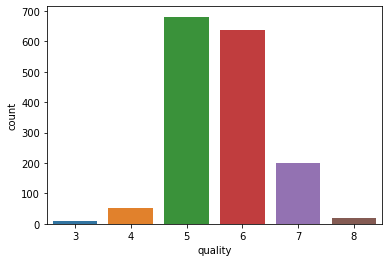

In [5]:
sns.countplot(x='quality', data=red_wine_data)

In [8]:
conditions = [
    (red_wine_data['quality'] >= 7),
    (red_wine_data['quality'] <= 4)
]
rate = ['good', 'bad']
red_wine_data['rating'] = np.select(conditions, rate, default='average')
red_wine_data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [5]:
#checking how the features are correlated with each other. It is best practise to check which
#features are more correlated with the target variable. The model will give more reliable output when we pass
#significant features into the model
correlations = red_wine_data.corr()['quality'].drop('quality')
print("Correaltion with target")
print(correlations)

Correaltion with target
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


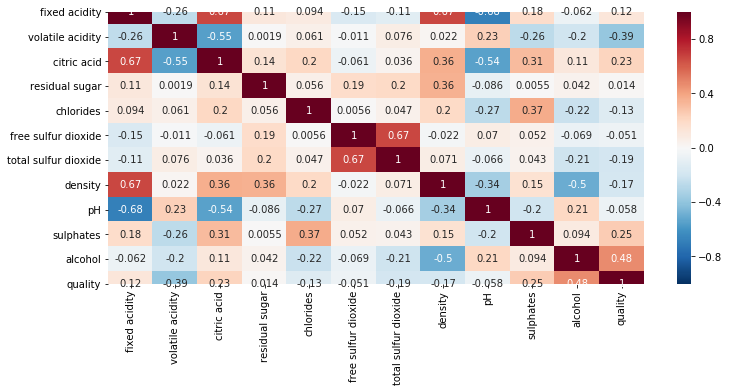

In [6]:
corr = red_wine_data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");

In [7]:
#we can remove colns which has less correlation with quality
y = red_wine_data['quality'].values
red_wine_data.drop("quality", axis=1, inplace=True,)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(red_wine_data, y, test_size=0.2, stratify=y, random_state=0,)

In [8]:
#Scaling
scale_cols = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scale_cols.transform(X_train)

#Scaling
scale_test_cols = sklearn.preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scale_test_cols.transform(X_test)

#K fold
strat_kfold = sklearn.model_selection.StratifiedKFold(5, random_state=0,)

In [17]:
#Linear Regression
linear_regression = sklearn.linear_model.LinearRegression()

estimator = sklearn.model_selection.GridSearchCV(
    linear_regression,
    param_grid={
        "fit_intercept": [True, False,],
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'fit_intercept': True}
Root Mean Squared 0.6495698955412138
Mean absolute error 0.5057958157710727
Performance on testing data
Root Mean Squared 0.6337948575606012
Mean absolute error 0.47637219008078197


In [10]:
#Decision Tree Regression
md = [1,2,3,4,5,10,15,20,25,30,35,40]
dt_model = sklearn.tree.DecisionTreeRegressor(random_state=0)
splitter=['best', 'random']
estimator = sklearn.model_selection.GridSearchCV(
    dt_model,
    param_grid={
        "splitter": ['best', 'random'],
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'max_depth': 3, 'splitter': 'best'}
Root Mean Squared 0.6604400294310376
Mean absolute error 0.5152976678349727
Performance on testing data
Root Mean Squared 0.6511648712841627
Mean absolute error 0.499117663540858


In [11]:
#Random forest regression
md = [5,10,15,20,25,30,35,40]
ne = [20,25,30,35,40,45,47,50]
rf_model = sklearn.ensemble.RandomForestRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    rf_model,
    param_grid={
        "n_estimators": ne,
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)
# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'max_depth': 20, 'n_estimators': 47}
Root Mean Squared 0.23085386374285244
Mean absolute error 0.1644247827436917
Performance on testing data
Root Mean Squared 0.5923902374250911
Mean absolute error 0.4372657283402431


In [12]:
#Ada boost ensemble
ne=[10,20,30,40,50,60,70]
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
ab_model = sklearn.ensemble.AdaBoostRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    ab_model,
    param_grid={
        "n_estimators": ne,
        "learning_rate": lr,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'learning_rate': 0.4, 'n_estimators': 50}
Root Mean Squared 0.5981781018928958
Mean absolute error 0.5017096707022278
Performance on testing data
Root Mean Squared 0.6176317844671996
Mean absolute error 0.4989152197883298


In [13]:
#SVM Regression
ker = ['rbf','linear','sigmoid']
svm_model = sklearn.svm.SVR()
estimator = sklearn.model_selection.GridSearchCV(
    svm_model,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'kernel': 'rbf'}
Root Mean Squared 0.5482490135734728
Mean absolute error 0.38521245344330296
Performance on testing data
Root Mean Squared 0.6159642099462691
Mean absolute error 0.44302538689168874


In [14]:
#Gaussian Process regression
ker = [DotProduct(), WhiteKernel(), RBF()]
gp = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    gp,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'kernel': DotProduct(sigma_0=1)}
Root Mean Squared 0.6495691136538531
Mean absolute error 0.5058130203885338
Performance on testing data
Root Mean Squared 0.6337714501340346
Mean absolute error 0.47636586166918277


In [15]:
#Neural Network Regression
hls = [(),(2),(4),(7),(8),(10)]
a = ['identity', 'tanh', 'relu']
s = ['lbfgs', 'sgd', 'adam']
nn = sklearn.neural_network.MLPRegressor()
estimator = sklearn.model_selection.GridSearchCV(
    nn,
    param_grid={
        "hidden_layer_sizes": hls,
        "activation": a,
        "solver": s,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'activation': 'relu', 'hidden_layer_sizes': 4, 'solver': 'lbfgs'}
Root Mean Squared 0.6075031229417458
Mean absolute error 0.47102624029218887
Performance on testing data
Root Mean Squared 0.6272442617649162
Mean absolute error 0.46820617248351404
